In [ ]:
# Upgrade pandas profiling
!pip install pandas-profiling --upgrade

## **Importing Libraries**

In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

## **Loading Dataset**

In [ ]:
# Loading data
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Data Preprocessing**

In [ ]:
# About data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Data mathematical information
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Pandas profiling before data preprocessing
profile = ProfileReport(data, title='Pandas profiling before data preprcessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [ ]:
# Convering pandas profiling info to html file
profile.to_file('data_train_before_preprocessing.html')

In [ ]:
# Check for null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Print unique values
print(data.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


##Cleaning

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.rename(columns = {'tenure': 'position'}, inplace = True)

In [ ]:
data.rename(columns = {'Dependents': 'client'}, inplace = True)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,client,position,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

highest MonthlyCharge so we can make discounts upon it


In [ ]:
high_gen = data.loc[data['MonthlyCharges'].idxmax()]
print(high_gen)

customerID                         7569-NMZYQ
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
client                                    Yes
position                                   72
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                         118.75
TotalCharges                          8672.45
Churn                                      No
Name: 4586, dtype: object


calculating the range between the highest MonthlyCharge and lowest for each gender

In [ ]:
data.groupby('gender').max()['MonthlyCharges'] - data.groupby('gender').min()['MonthlyCharges']

gender
Female    100.35
Male      100.10
Name: MonthlyCharges, dtype: float64

calculating the customers who stopped having a streaming TV and left in the last month

In [ ]:
data.query("Churn == 'Yes' and StreamingTV == 'No'")

,customerID,gender,SeniorCitizen,Partner,client,position,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


checking when the partner culomn effect the churn

In [ ]:
data[(data['Churn']=='Yes') & (data['Partner']=='Yes')]

,customerID,gender,SeniorCitizen,Partner,client,position,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,6583-QGCSI,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35,Yes
6996,4174-LPGTI,Female,0,Yes,Yes,41,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.6,Yes
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


 Checking if the clients culomn effect the churn

In [ ]:
data.loc[(data['Churn'] == 'Yes') & (data['client'] == 'Yes')]

,customerID,gender,SeniorCitizen,Partner,client,position,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.1,Yes
80,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,7693-LCKZL,Male,0,Yes,Yes,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,385,Yes
6943,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.5,Yes
6945,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.5,Yes
6996,4174-LPGTI,Female,0,Yes,Yes,41,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.6,Yes


visulizing the relationship between churn and position

Text(0.5, 1.0, 'Average position for customers who churned and those who did not')

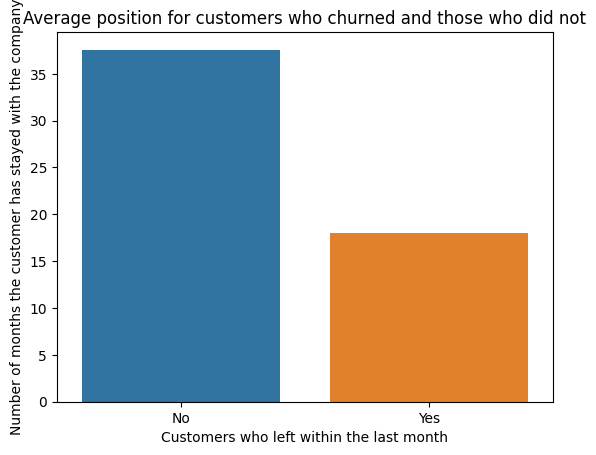

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by Churn and calculate the mean tenure for each group
mean_tenure_by_churn = data.groupby('Churn')['position'].mean()

# Create a bar plot of the mean tenure for each group
sns.barplot(x=mean_tenure_by_churn.index, y=mean_tenure_by_churn.values)

# Set the x-axis label and y-axis label
plt.xlabel('Customers who left within the last month')
plt.ylabel('Number of months the customer has stayed with the company')

# Set the plot title
plt.title('Average position for customers who churned and those who did not')

most used internst service

Text(0, 0.5, 'Number of Customers')

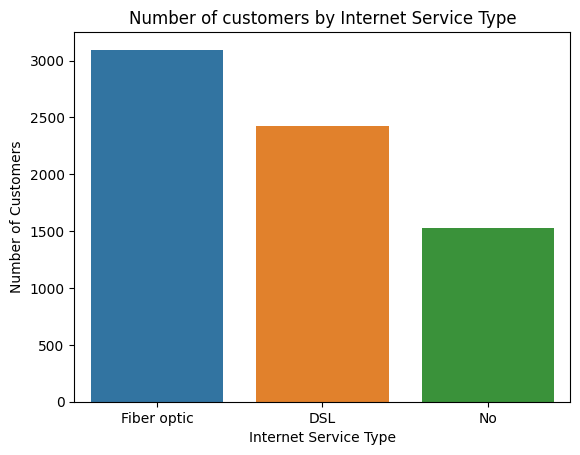

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of occurrences of each InternetService type
internet_service_counts = data['InternetService'].value_counts()

# Create a bar plot of the InternetService counts
sns.barplot(x=internet_service_counts.index, y=internet_service_counts.values)

# Set the plot title and axis labels
plt.title('Number of customers by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')


type of contract leads to what end

In [ ]:
contract_churn = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(contract_churn)

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


how the paymant method effects the Monthly charges

In [ ]:
pay_churn = data.groupby('PaymentMethod')['MonthlyCharges'].value_counts(normalize=True).unstack()
print(pay_churn)

MonthlyCharges               18.25     18.40     18.55     18.70     18.75   \
PaymentMethod                                                                 
Bank transfer (automatic)       NaN  0.000648       NaN       NaN  0.000648   
Credit card (automatic)    0.000657       NaN  0.000657       NaN       NaN   
Electronic check                NaN       NaN       NaN       NaN       NaN   
Mailed check                    NaN       NaN       NaN  0.001241       NaN   

MonthlyCharges               18.80     18.85     18.90     18.95     19.00   \
PaymentMethod                                                                 
Bank transfer (automatic)       NaN  0.000648       NaN       NaN       NaN   
Credit card (automatic)    0.000657       NaN  0.000657  0.000657  0.001314   
Electronic check                NaN  0.000423       NaN       NaN  0.000423   
Mailed check               0.003722  0.001861  0.000620  0.003102  0.002481   

MonthlyCharges             ...    117.35    117.45

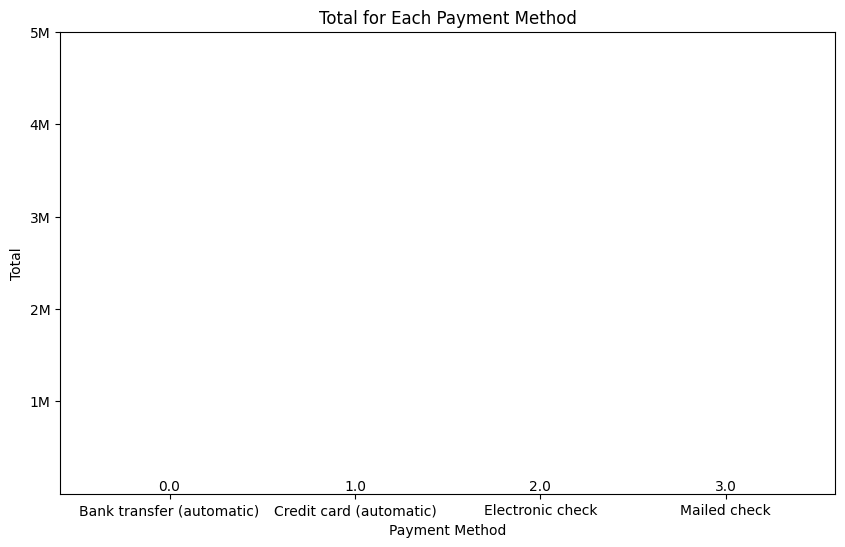

In [ ]:
result = data.groupby("PaymentMethod")["TotalCharges"].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))

bars = plt.bar(result["PaymentMethod"], result["TotalCharges"])

# Add labels and title
plt.xlabel("Payment Method")
plt.ylabel("Total")
plt.title("Total for Each Payment Method")
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.1f}", (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom')

plt.yticks(np.arange(1000000, 5000000 + 1, 1000000), [f"{x/1000000:.0f}M" for x in np.arange(1000000, 5000000 + 1, 1000000)])

plt.show()
# Display the plot

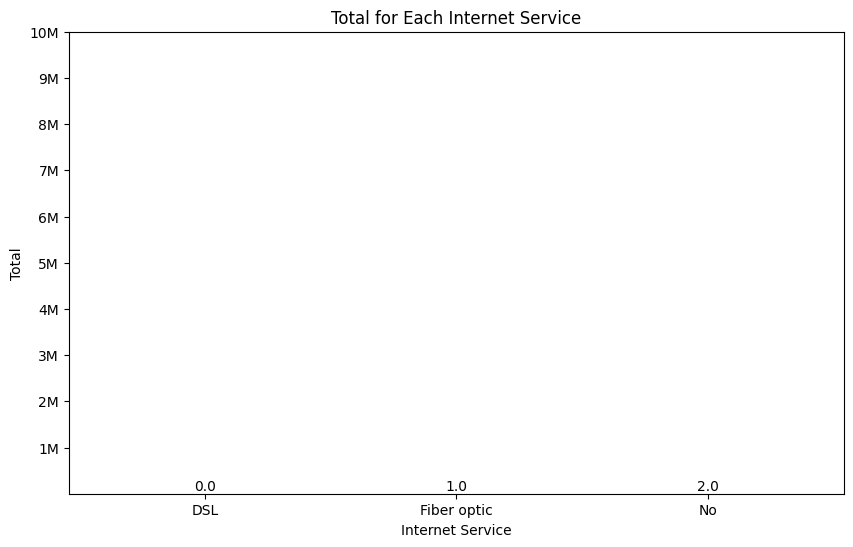

In [ ]:
result = data.groupby("InternetService")["TotalCharges"].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))

bars = plt.bar(result["InternetService"], result["TotalCharges"])

# Add labels and title
plt.xlabel("Internet Service")
plt.ylabel("Total")
plt.title("Total for Each Internet Service")
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.1f}", (bar.get_x() + bar.get_width() / 2, height),
                 ha='center', va='bottom')

plt.yticks(np.arange(1000000, 10000000 + 1, 1000000), [f"{x/1000000:.0f}M" for x in np.arange(1000000, 10000000 + 1, 1000000)])

plt.show()
# Display the plot

Text(0, 0.5, 'Monthly Charges')

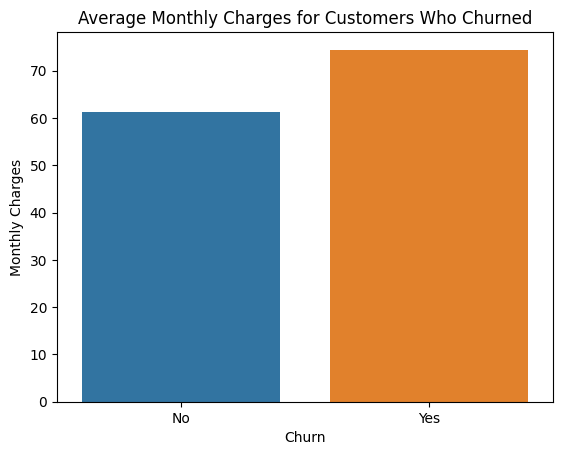

In [ ]:
import seaborn as sns

# Group the data by the 'Churn' variable and select the 'MonthlyCharges' column
churned_data = data.groupby('Churn')['MonthlyCharges'].mean().reset_index()

# Create a bar plot of the MonthlyCharges variable for customers who churned
sns.barplot(x='Churn', y='MonthlyCharges', data=churned_data)

# Set the plot title and axis labels
plt.title('Average Monthly Charges for Customers Who Churned')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

#Prediction

making a prediction on who is likely to churn

In [ ]:
# Group the data by the 'Churn' variable and calculate the mean of each numeric column
grouped_data = data.groupby('Churn').mean()

# Calculate the difference between the mean values of the churned and non-churned groups
diff = grouped_data.loc['Yes'] - grouped_data.loc['No']

# Identify the variables that have the largest differences between the churned and non-churned groups
top_vars = diff.nlargest(3).index

# Select a customer to make a prediction for (in this case, the customer with the lowest CustomerID)
new_customer = data.loc[data['customerID'] == data['customerID'].min()]

# Make a prediction based on the values of the top variables for the new customer
if new_customer[top_vars].mean().sum() > diff[top_vars].sum():
    print(f"Customer {new_customer['customerID'].values[0]} is likely to churn.")
else:
    print(f"Customer {new_customer['customerID'].values[0]} is not likely to churn.")

Customer 0002-ORFBO is likely to churn.


<ipython-input-28-c65622144a12>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby('Churn').mean()
